In [136]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Basic

a) How many passengers are in the training data?

In [137]:
no_of_passengers = df['PassengerId'].nunique()
print(f'Answer: {no_of_passengers}')

Answer: 891


b) Plot the distribution of the following qualities: Ticket class, sex, and port of
embarkation?

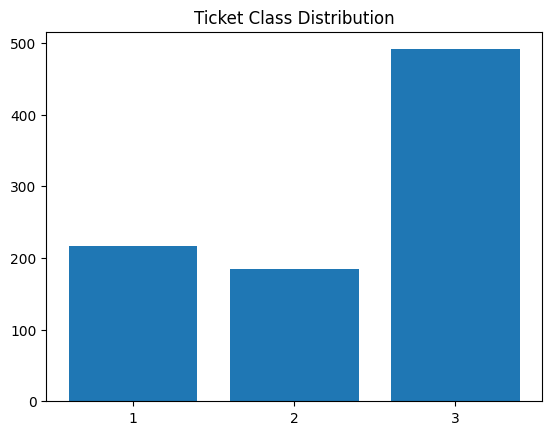

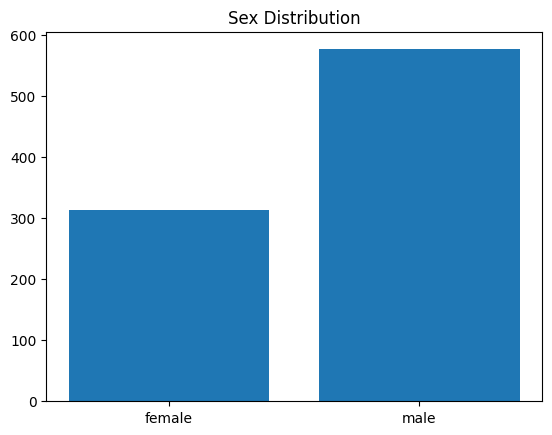

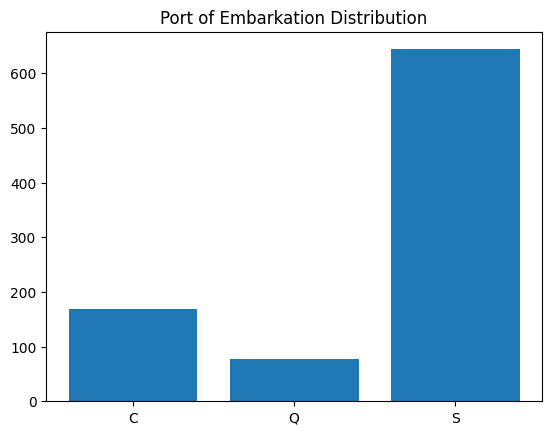

In [138]:
# -- Ticket class --
values = df['Pclass'].value_counts().sort_index()
plt.bar([str(x) for x in values.index], values)
plt.title('Ticket Class Distribution')
plt.show()

# -- Sex --
values = df['Sex'].value_counts().sort_index()
plt.bar(values.index, values)
plt.title('Sex Distribution')
plt.show()

# -- Sex --
values = df['Embarked'].value_counts().sort_index()
plt.bar(values.index, values)
plt.title('Port of Embarkation Distribution')
plt.show()

c) What is the mean, upper/lower quantile, and standard deviation of age and fare?

In [139]:
ages = df['Age'].describe().round(3)
fares = df['Fare'].describe().round(3)

print(f'-- Age Statistics --')
print('Mean: ', ages['mean'])
print(f'Upper Quantile: {ages["75%"]}\tLower Quantile: {ages["25%"]}')
print('Standard Deviation: ', ages['std'])
print()
print(f'-- Fare Statistics --')
print('Mean: ', fares['mean'])
print(f'Upper Quantile: {fares["75%"]}\tLower Quantile: {fares["25%"]}')
print('Standard Deviation: ', fares['std'])


-- Age Statistics --
Mean:  29.699
Upper Quantile: 38.0	Lower Quantile: 20.125
Standard Deviation:  14.526

-- Fare Statistics --
Mean:  32.204
Upper Quantile: 31.0	Lower Quantile: 7.91
Standard Deviation:  49.693


d) Plot the distribution of the number of siblings/spouses aboard the titanic. Do you
find anything interesting for >5?

Answer: 
Passengers with more than 5 siblings/spouses aboard were extremely rare, and they generally had low survival rates, likely due to being in lower class and the difficulty of coordinating evacuation for large groups.

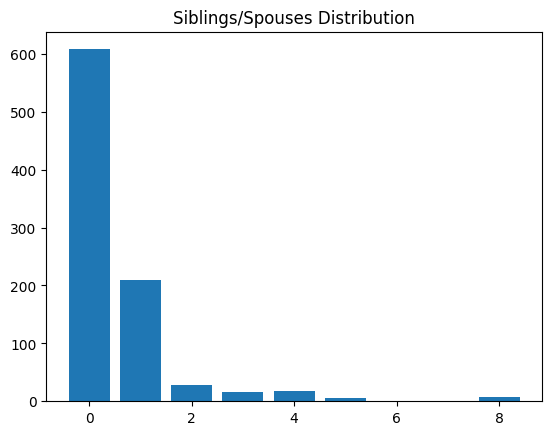

In [140]:
# -- Sex --
values = df['SibSp'].value_counts().sort_index()
plt.bar(values.index, values)
plt.title('Siblings/Spouses Distribution')
plt.show()

### Advanced

How many unique cabins there are for each cabin type (i.e. A to T)?

In [141]:
cabin_types = [chr(ord('A') + i) for i in range(ord('T') - ord('A') + 1)]

cabins = []

# Include all cabins for each passenger
for k in df['Cabin'].unique():
    if not isinstance(k, str):
        continue
    
    cabins += k.split(' ')
    
cabins = pd.Series(cabins)
cabins.name = 'Cabin'
cabin_df = pd.DataFrame()
cabin_df['Cabin'] = cabins
cabin_df['Type'] = cabins.apply(lambda x: x[0])

cabin_df = cabin_df.groupby('Type').nunique().rename(columns={'Cabin': 'No. of Unique Cabins'}).reset_index()
cabin_df

,Type,No. of Unique Cabins
0,A,15
1,B,41
2,C,46
3,D,26
4,E,24
5,F,5
6,G,3
7,T,1


b) Please rank the cheapness of the cabin by its starting alphabet. (e.g. C128 is “C”,
A6 is “A”).

In [142]:
# So A = most expensive → rank 1, T = cheapest → rank N
cabin_df['Cheapness Rank'] = cabin_df['Type'].rank(method='dense', ascending=False).astype(int)

# Final output
print("\nCabin cheapness ranking (higher = cheaper)")
cabin_df.sort_values('Cheapness Rank')


Cabin cheapness ranking (higher = cheaper)


,Type,No. of Unique Cabins,Cheapness Rank
7,T,1,1
6,G,3,2
5,F,5,3
4,E,24,4
3,D,26,5
2,C,46,6
1,B,41,7
0,A,15,8


c) Does the cabin alphabet or the cabin number affect the survival rate?

In [143]:
survival_df = df.copy().dropna(subset=['Cabin'])
survival_df['Type'] = survival_df['Cabin'].apply(lambda x: x[0])

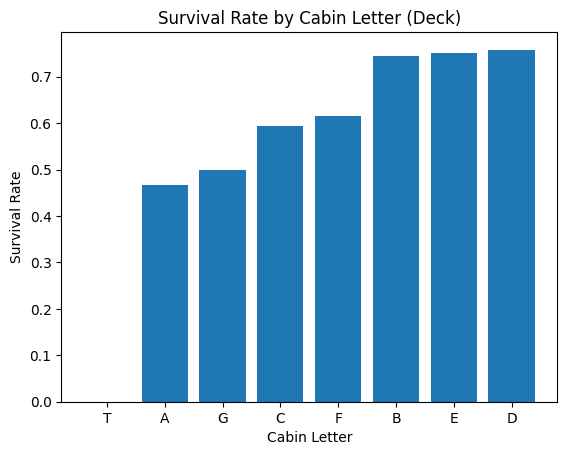

In [144]:
cabin_survival = survival_df.groupby('Type')['Survived'].mean().sort_values().round(3)

# Plot
plt.bar(list(cabin_survival.index), list(cabin_survival))
plt.title("Survival Rate by Cabin Letter (Deck)")
plt.xlabel("Cabin Letter")
plt.ylabel("Survival Rate")
plt.show()

In [146]:
from scipy.stats import chi2_contingency

def hypothesis_result(p_val):
    if p_val < 0.05:
        print(f'{p_val:.4f} < 0.05, there is strong statistical evidence')
    else:
        print(f'{p_val:.4f} > 0.05, there is no statistical evidence')

titanic = df.dropna(subset=["Cabin", "Survived"])
titanic['Type'] = titanic['Cabin'].apply(lambda x: x[0])

# Create contingency table
contingency = pd.crosstab(titanic['Type'], titanic['Survived'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared test statistic = {chi2:.4f}, p-value = {p:.4f}")
hypothesis_result(p)

Chi-squared test statistic = 10.3006, p-value = 0.1722
0.1722 > 0.05, there is no statistical evidence


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_14397/3527793268.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Type'] = titanic['Cabin'].apply(lambda x: x[0])


In [150]:
import re
from scipy.stats import ttest_ind

def extract_number(cabin):
    if isinstance(cabin, str):
        match = re.search(r'\d+', cabin.split()[0])
        return int(match.group()) if match else None
    return None

titanic['Cabin No.'] = titanic['Cabin'].apply(extract_number)
subset = titanic[['Cabin No.', 'Survived']].dropna()

survived = subset[subset['Survived'] == 1]['Cabin No.']
not_survived = subset[subset['Survived'] == 0]['Cabin No.']

# Run Welch’s t-test (unequal variances)
t_stat, p_val = ttest_ind(survived, not_survived, equal_var=False)

# Step 5: Report result
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Optional: print means
print(f"Mean cabin number (survived): {survived.mean():.2f}")
print(f"Mean cabin number (not survived): {not_survived.mean():.2f}")

hypothesis_result(p_val)

T-test statistic: -0.7632
P-value: 0.4469
Mean cabin number (survived): 48.76
Mean cabin number (not survived): 52.94
0.4469 > 0.05, there is no statistical evidence


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_14397/2842127948.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Cabin No.'] = titanic['Cabin'].apply(extract_number)


How does the following relate to the survival rate?
1) Sex
2) Age
3) Embark port
4) No. of sibling/spouse

In [155]:
titanic = df.dropna(subset=["Survived"])

# 1. Survival rate by Sex
print("1. Survival rate by Sex:")
print(titanic.groupby('Sex')['Survived'].mean().round(3), '\n')

# 2. Survival rate by Age Group
titanic['age_bin'] = pd.cut(titanic['Age'], bins=[10 * i for i in range(9)], include_lowest=True)
print("2. Survival rate by Age Bin:")
print(titanic.groupby('age_bin')['Survived'].mean().round(3), '\n')

# 3. Survival rate by Embarked Port
print("3. Survival rate by Embarked Port:")
print(titanic.groupby('Embarked')['Survived'].mean().round(3), '\n')

# 4. Survival rate by Number of Siblings/Spouses
print("4. Survival rate by SibSp:")
print(titanic.groupby('SibSp')['Survived'].mean().round(3), '\n')

1. Survival rate by Sex:
Sex
female    0.742
male      0.189
Name: Survived, dtype: float64 

2. Survival rate by Age Bin:
age_bin
(-0.001, 10.0]    0.594
(10.0, 20.0]      0.383
(20.0, 30.0]      0.365
(30.0, 40.0]      0.445
(40.0, 50.0]      0.384
(50.0, 60.0]      0.405
(60.0, 70.0]      0.235
(70.0, 80.0]      0.200
Name: Survived, dtype: float64 

3. Survival rate by Embarked Port:
Embarked
C    0.554
Q    0.390
S    0.337
Name: Survived, dtype: float64 

4. Survival rate by SibSp:
SibSp
0    0.345
1    0.536
2    0.464
3    0.250
4    0.167
5    0.000
8    0.000
Name: Survived, dtype: float64 



/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_14397/2250708354.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('age_bin')['Survived'].mean().round(3), '\n')


### Visualization & More

a) Create a histogram plot for the distribution of age, fare, # of parents/children
abroad and # of siblings/spouses abroad.

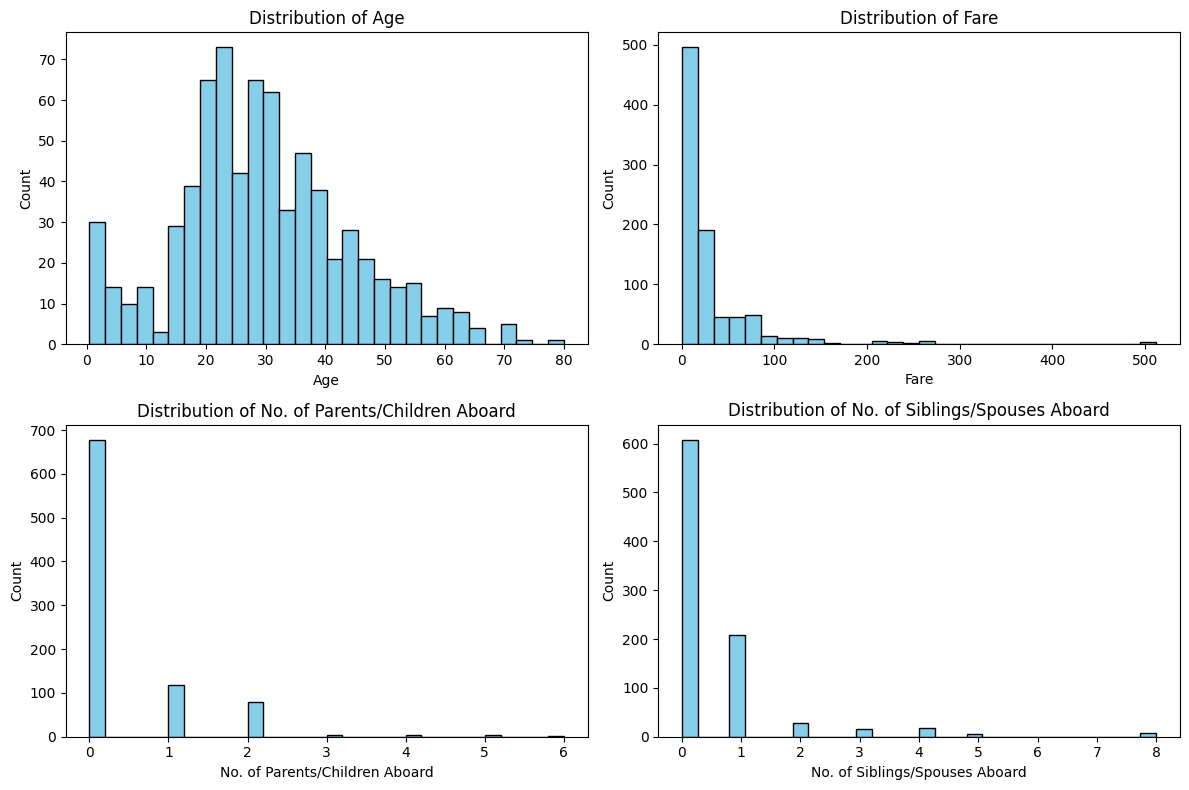

In [156]:
# Features to plot
features = ['Age', 'Fare', 'Parch', 'SibSp']
titles = ['Age', 'Fare', 'No. of Parents/Children Aboard', 'No. of Siblings/Spouses Aboard']

plt.figure(figsize=(12, 8))

for i, (feature, title) in enumerate(zip(features, titles), 1):
    plt.subplot(2, 2, i)
    plt.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

b) On the same plot, plot the distribution of age for different sex.

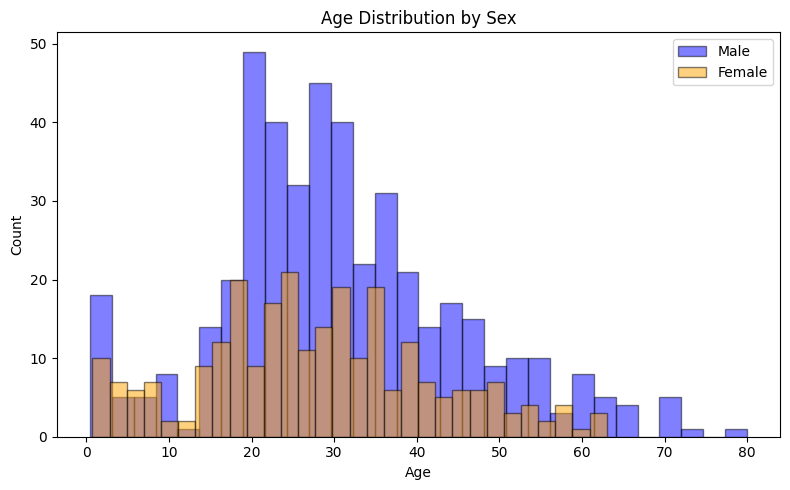

In [161]:
titanic = df.dropna(subset=['Age', 'Sex'])

ages_male = titanic[titanic['Sex'] == 'male']['Age']
ages_female = titanic[titanic['Sex'] == 'female']['Age']

# Plot
plt.figure(figsize=(8, 5))
plt.hist(ages_male, bins=30, alpha=0.5, label='Male', color='blue', edgecolor='black')
plt.hist(ages_female, bins=30, alpha=0.5, label='Female', color='orange', edgecolor='black')

plt.title("Age Distribution by Sex")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

c) On the same plot, plot the distribution of fare for survived and non-survived
passengers.

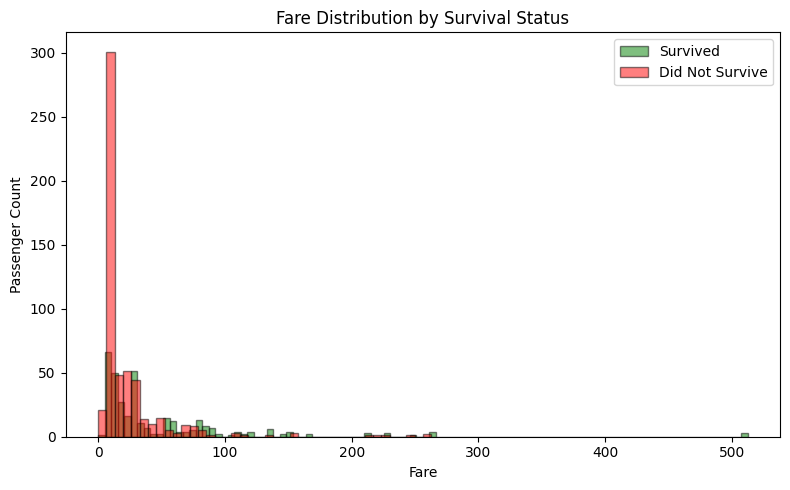

In [164]:
titanic = df.dropna(subset=['Fare', 'Survived'])

fare_survived = titanic[titanic['Survived'] == 1]['Fare']
fare_not_survived = titanic[titanic['Survived'] == 0]['Fare']

plt.figure(figsize=(8, 5))
plt.hist(fare_survived, bins=100, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(fare_not_survived, bins=40, alpha=0.5, label='Did Not Survive', color='red', edgecolor='black')

plt.title("Fare Distribution by Survival Status")
plt.xlabel("Fare")
plt.ylabel("Passenger Count")
plt.legend()
plt.tight_layout()
plt.show()

d) Repeat a-c by creating a “KDE” plot using panda functions.

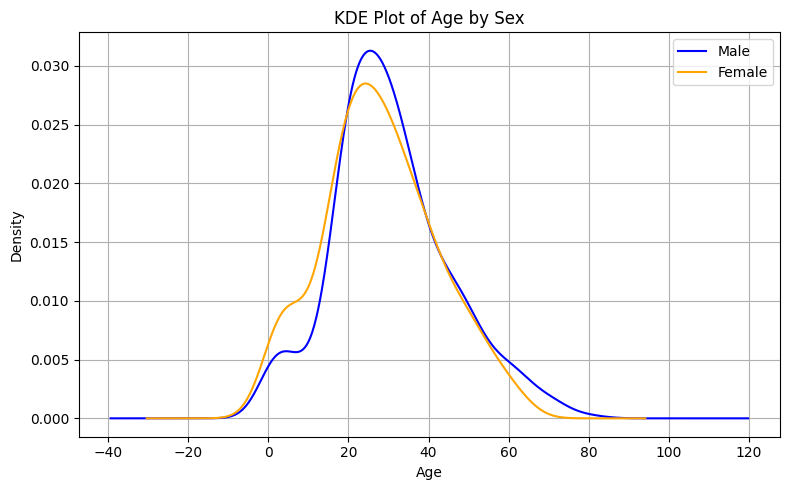

In [165]:
plt.figure(figsize=(8, 5))
titanic = df.dropna(subset=['Age', 'Sex'])
titanic[titanic['Sex'] == 'male']['Age'].plot.kde(label='Male', color='blue')
titanic[titanic['Sex'] == 'female']['Age'].plot.kde(label='Female', color='orange')

plt.title('KDE Plot of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

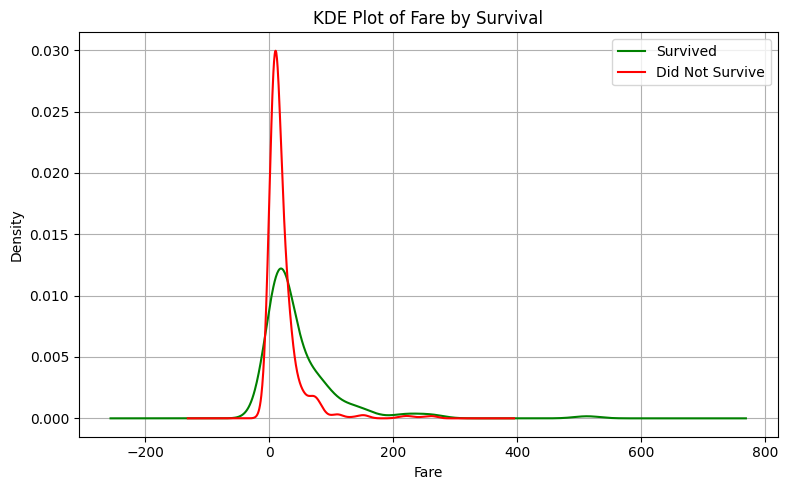

In [167]:
titanic = df.dropna(subset=['Fare', 'Survived'])

plt.figure(figsize=(8, 5))
titanic[titanic['Survived'] == 1]['Fare'].plot.kde(label='Survived', color='green')
titanic[titanic['Survived'] == 0]['Fare'].plot.kde(label='Did Not Survive', color='red')

plt.title('KDE Plot of Fare by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

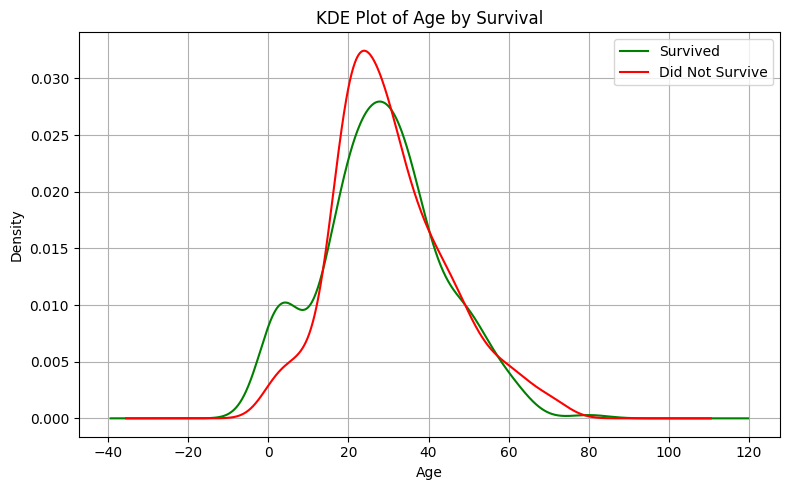

In [168]:
titanic = df.dropna(subset=['Age', 'Survived'])

plt.figure(figsize=(8, 5))
titanic[titanic['Survived'] == 1]['Age'].plot.kde(label='Survived', color='green')
titanic[titanic['Survived'] == 0]['Age'].plot.kde(label='Did Not Survive', color='red')

plt.title('KDE Plot of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


e) Write down the formula for the KDE plot, assuming that the standard normal
density function is selected for the kernel function.

$$
\hat{f}_h(x) = \frac{1}{n h \sqrt{2\pi}} \sum_{i=1}^{n} \exp\left( -\frac{1}{2} \left( \frac{x - x_i}{h} \right)^2 \right)
$$